# Quick check of the distribution of normal variables squared

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
tot_vals = 1000
x_norm_vals = stats.norm.rvs(size=tot_vals, random_state=None)

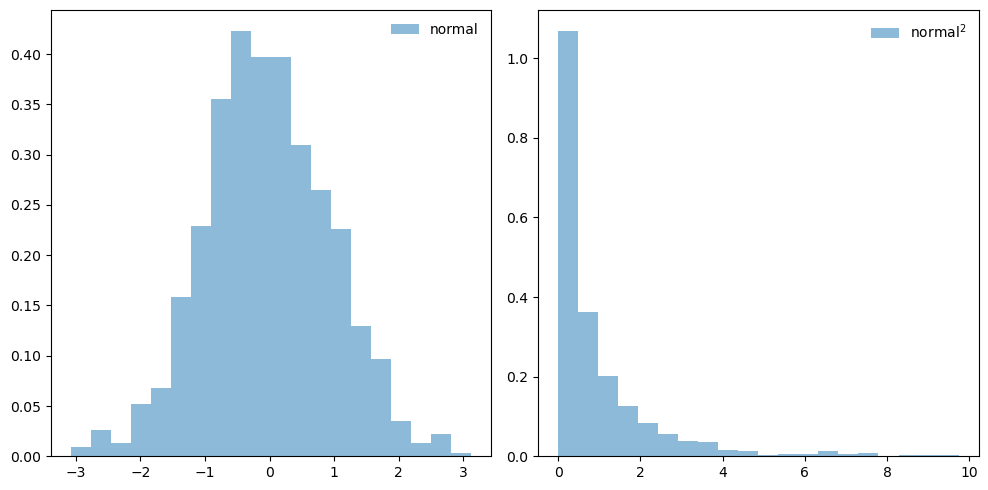

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].hist(x_norm_vals, bins=20, density=True, alpha=0.5, label='normal')
ax[0].legend(loc='best', frameon=False)

ax[1].hist(x_norm_vals**2, bins=20, density=True, alpha=0.5, label=r'${\rm normal}^2$')
ax[1].legend(loc='best', frameon=False)

fig.tight_layout()

In [4]:
def sum_norm_squares(num):
    """
    Return the sum of num random variables each the square of a random draw
    from a normal distribution
    """
    return np.sum(stats.norm.rvs(size=num, random_state=None)**2)

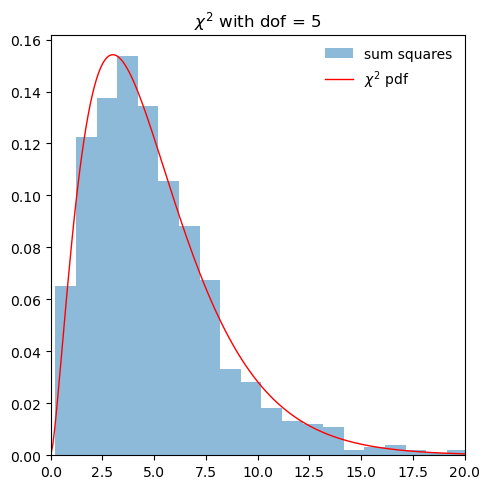

In [5]:
num = 5   # number of squared normal-distributed random variables to sum
tot_vals = 1000  # no. of trials
sum_xsq_vals = np.array([sum_norm_squares(num) for i in range(tot_vals)])

fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.hist(sum_xsq_vals, bins=20, density=True, alpha=0.5, label='sum squares')

x = np.linspace(0,100,1000)
dofs = num
ax.plot(x, stats.chi2.pdf(x, dofs),
       'r-', lw=1, alpha=1, label=r'$\chi^2$ pdf')

ax.set_xlim((0, max(20, 2*dofs)))
ax.legend(loc='best', frameon=False)

ax.set_title(fr'$\chi^2$ with dof = {dofs}')

fig.tight_layout()

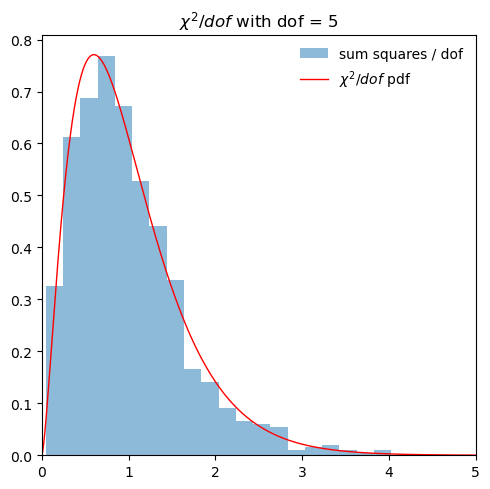

In [6]:

fig, ax = plt.subplots(1, 1, figsize=(5,5))

scaled_sum = sum_xsq_vals/num
ax.hist(scaled_sum, bins=20, density=True, alpha=0.5, 
        label='sum squares / dof')

dofs = num
x = np.linspace(0,5*dofs,1000)
ax.plot(x/dofs, dofs*stats.chi2.pdf(x, dofs),
       'r-', lw=1, alpha=1, label=r'$\chi^2/dof$ pdf')

ax.set_xlim((0, 5))
ax.legend(loc='best', frameon=False)

ax.set_title(fr'$\chi^2/dof$ with dof = {dofs}')
fig.tight_layout()